# Data Cleansing :: Categorical Data

### 이산형 데이터를 어떻게 처리할까?
> #### One-Hot Encoding
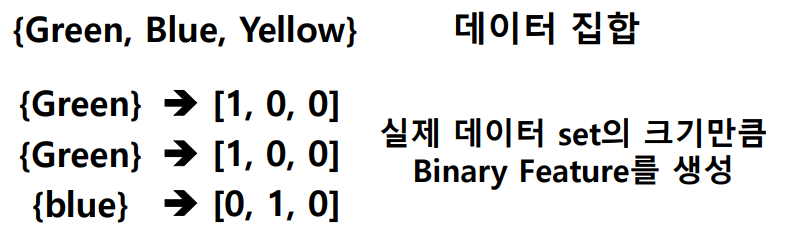


***Data Type***

In [1]:
import pandas as pd
import numpy as np

In [2]:
edges = pd.DataFrame({'source': [0, 1, 2],
                   'target': [2, 2, 3],
                       'weight': [3, 4, 5],
                       'color': ['red', 'blue', 'blue']})

edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [3]:
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [4]:
edges["color"]

0     red
1    blue
2    blue
Name: color, dtype: object

***One Hot Encoding***

In [5]:
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [6]:
pd.get_dummies(edges[["color"]])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


***

In [7]:
weight_dict = {3:"M", 4:"L", 5:"XL"}
edges["weight_sign"] = edges["weight"].map(weight_dict)
edges

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [8]:
weight_sign = pd.get_dummies(edges["weight_sign"])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [9]:
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


In [10]:
pd.get_dummies(edges).values

array([[0, 2, 3, 0, 1, 0, 1, 0],
       [1, 2, 4, 1, 0, 1, 0, 0],
       [2, 3, 5, 1, 0, 0, 0, 1]], dtype=int64)

### Data Binning :: 데이터의 구간을 나눠보자
> 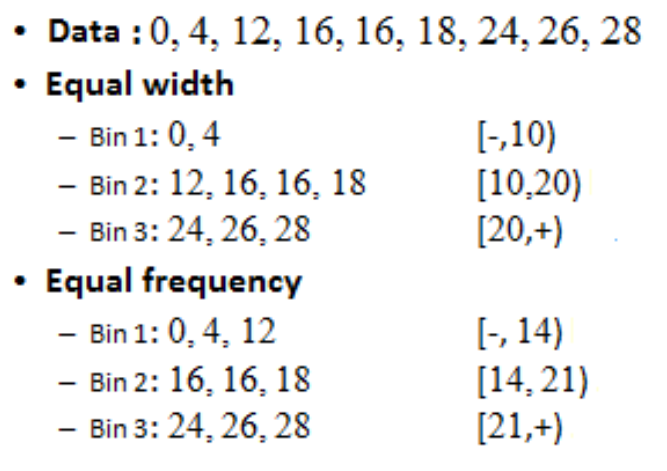

In [11]:

# Example from - https://chrisalbon.com/python/pandas_binning_data.html

raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [12]:
bins = [0, 25, 50, 75, 100] # Define bins as 0 to 25, 25 to 50, 60 to 75, 75 to 100
group_names = ['Low', 'Okay', 'Good', 'Great']  #구간명
categories = pd.cut(df['postTestScore'], bins, labels=group_names)  #cut후 categories에 할당
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

In [13]:
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)
pd.value_counts(df['categories'])  #기존 dataframe에 할당

Good     8
Great    2
Low      2
Okay     0
Name: categories, dtype: int64

In [14]:
df

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Sone,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


In [15]:
pd.get_dummies(df)

,preTestScore,postTestScore,regiment_Dragoons,regiment_Nighthawks,regiment_Scouts,company_1st,company_2nd,name_Ali,name_Cooze,name_Jacobson,...,name_Milner,name_Piger,name_Riani,name_Ryaner,name_Sloan,name_Sone,categories_Low,categories_Okay,categories_Good,categories_Great
0,4,25,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,94,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,31,57,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,62,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,3,70,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,4,25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,24,94,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,31,57,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,2,62,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,3,70,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### using scikit-learn preprocessing

***Label encoding by sklearn***
- scikit-learn의 preprocessing 패키지도 label, one-hot 지원

In [16]:
raw_example = df.values
raw_example[:3]

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [17]:
data = raw_example.copy()

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()  #Encoder 생성

In [19]:
raw_example[:,0]  

array(['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons',
       'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts',
       'Scouts'], dtype=object)

In [20]:
le.fit(raw_example[:,0])  #data에 맞게 encoding fitting

LabelEncoder()

In [21]:
le.transform(raw_example[:,0])  #실제 데이터 -> labelling data

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [22]:
data[:,0] = le.transform(raw_example[:,0])
data[:3]

array([[1, '1st', 'Miller', 4, 25, 'Low'],
       [1, '1st', 'Jacobson', 24, 94, 'Great'],
       [1, '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

##### ※ Label encoder의 fit과 transform의 과정이 나눠진 이유
>- 새로운 데이터 입력시, 기존 labelling 규칙을 그대로 적용할 필요가 있음
>- fit은 규칙을 생성하는 과정
>- transform은 규칙을 적용하는 과정
>- fit을 통해 규칙이 생성된 라벨인코더는 따로 저장하여 새로운 데이터를 입력할 경우 사용할 수 있음
>- 인코더들을 실제 시스템에 사용할 경우 pickle화 필요

In [23]:
label_column = [0,1,2,5]
label_enconder_list = []
for column_index in  label_column:
    le = preprocessing.LabelEncoder()
    le.fit(raw_example[:,column_index])
    data[:,column_index] = le.transform(raw_example[:,column_index])
    label_enconder_list.append(le)  #기존 라벨인코더를 따로 저장
    del le 
data[:3]

array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0]], dtype=object)

In [24]:
#저장된 le로 새로운 데이터에 적용
label_enconder_list[0].transform(raw_example[:10,0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2])

### One-hot encoding by sklearn
>- numeric labelling이 완료된 데이터에 one-hot 적용
>- data는 1차원으로 변환하여 넣어줄 것을 권장

In [25]:
one_hot_enc = preprocessing.OneHotEncoder()
data[:,0].reshape(-1,1) 

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [26]:
#1-dim 변환하여 fit
one_hot_enc.fit(data[:,0].reshape(-1,1))

OneHotEncoder()

In [27]:
onehotlabels = one_hot_enc.transform(data[:,0].reshape(-1,1)).toarray()
onehotlabels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])